# 绘制风场

In [9]:
pwd

'/workspace/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind'

In [8]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接


## data
sql_location ="select b.lat,b.lon,a.tTime,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime in( '2019-08-09 23:00') and b.Province= '浙江')"

# sql_location ="select b.lat,b.lon,a.IIiii,a.fFy,a.dFy from TAB_Mws2019 as a left join \
# TAB_StationInfo as b on a.IIiii = b.IIiii where(tTime == '2019-08-09 23:00' and '2019-08-10 06:00' and b.Province= '浙江')"


df_location = pd.read_sql(sql_location , con=conn)

#df_location.drop_duplicates(subset=['IIiii'], keep='last', inplace=True)
df_location.to_csv('wind_0809_23.csv')
df_location




# sql_rr = "select b.lat,b.lon,a.IIiii,a.RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii = b.IIiii \
# where(tTime between '2019-08-09 23:00' and '2019-08-10 06:00' and (b.City = '台州' and b.Type = '区域站') ) "

# df_rr = pd.read_sql(sql_rr , con=conn)


# # 分组聚合
# grouped = df_rr.groupby(df_rr['IIiii'])
# average_rr = grouped.mean()

# average_rr


# all_rr =pd.merge(df_location,average_rr,on='IIiii')
# all_rr

,lat,lon,tTime,IIiii,fFy,dFy
0,28.450000,119.483333,2019-08-09 23:00:00,K0101,125,313
1,27.983333,119.633333,2019-08-09 23:00:00,K0102,56,143
2,30.266667,120.166667,2019-08-09 23:00:00,K1001,17,42
3,30.366667,120.133333,2019-08-09 23:00:00,K1002,83,27
4,30.300000,120.333333,2019-08-09 23:00:00,K1003,116,33
...,...,...,...,...,...,...
2927,30.316667,122.016667,2019-08-09 23:00:00,K9727,280,61
2928,30.216667,121.883333,2019-08-09 23:00:00,K9728,276,102
2929,29.720000,122.150000,2019-08-09 23:00:00,K9735,274,113
2930,30.770000,122.650000,2019-08-09 23:00:00,K9739,277,83


In [10]:
pwd

'/workspace/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_wind'

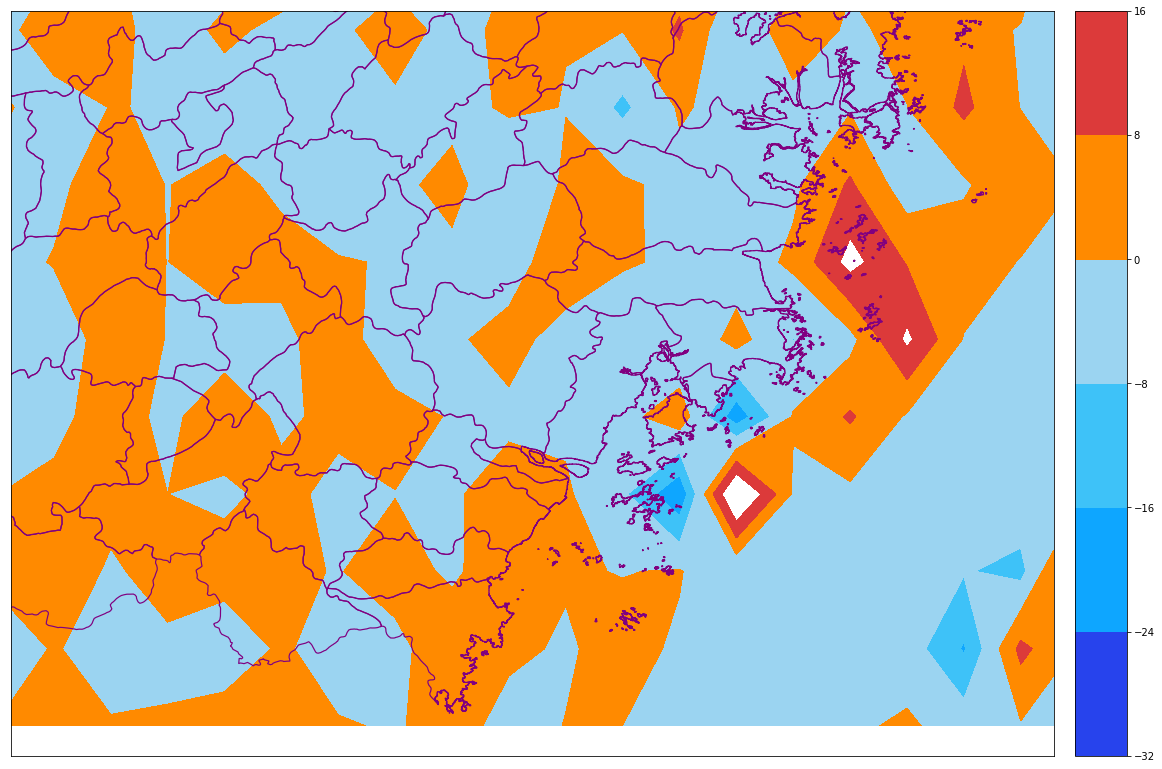

In [13]:
# 局地地形的
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
self_define_list = [33,53,74,93,110,130,180,240]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()




f = netCDF4.Dataset('zdz_dv.nc')

dv =  f.variables['dv'][:,:]*10000
lat = f.variables['lat']
lon = f.variables['lon']



box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=119,llcrnrlat=27.0,urcrnrlon=122.5,urcrnrlat=29.5)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [-32,-24,-16,-8,0,8,16]
lons, lats = np.meshgrid(lon[::5], lat[::5])





shade = m.contourf(lons,lats,dv[::5,::5],cmap=cmaps,levels=levels)
#shade = m.contourf(lons,lats,dv[::5,::5])
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)

m.colorbar(shade)